<a href="https://colab.research.google.com/github/sambhajizambre/Assignments/blob/main/local%20outlier%20factor%20on%20superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from numpy import percentile
import seaborn as sns
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random

# Preparing the dataset


In [3]:
df= pd.read_csv("/content/drive/MyDrive/python/superstore.csv")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.shape

(9994, 21)

# Sales Variable Analysis

In [7]:
df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

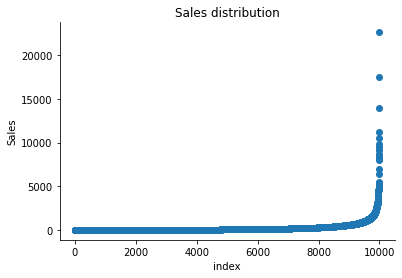

In [8]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

# Creating input and target variables

In [13]:
X=df.iloc[:,-4]
X

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64

In [15]:
y=df.iloc[:, -1]
y

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64

In [17]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf

LocalOutlierFactor(contamination=0.1)

Use fit_predict() to compute the predicted labels of the training samples. When LOF is used for outlier detection, the estimator has no predict(), decision_function() and score_samples() methods.

In [39]:
# use fit_predict to compute the predicted labels of the training samples
clf.fit(df['Sales'].values.reshape(-1, 1))
y_pred = clf.fit_predict(df['Sales'].values.reshape(-1, 1))
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

In [40]:
y_pred


array([ 1, -1,  1, ...,  1,  1,  1])

In [41]:
X_scores

array([-1.05885686, -1.3738282 , -0.98104422, ..., -0.96793834,
       -1.01527037, -1.00322824])

LOF score(x_scores) tells us if a data point has a substantially lower density than its neighbors, then the data point is considered as an outlier.

y_pred is 1 for an inlier and -1 for an outlier.

Visualize the outliers using matplotlib, where the LOF score is not 1.

In [45]:
df1 = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = clf.decision_function(df1)
outlier = clf.predict(df1)

plt.figure(figsize=(10,4))
plt.plot(df1, anomaly_score, label='anomaly score')
plt.fill_between(df1.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

AttributeError: ignored

In [33]:
lofs_index = np.where(y_pred!=1)
values = X[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(clf[:,0], clf[:,1], label="Normal")
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")
plt.legend(loc="upper left")
plt.show()

KeyError: ignored

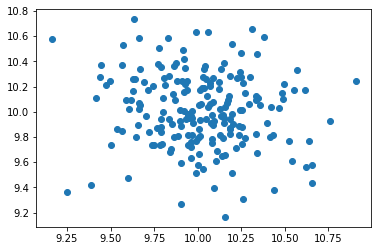

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)
print(lof) 

LocalOutlierFactor(contamination=0.03)


In [ ]:
y_pred = lof.fit_predict(x)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
lofs_index = where(y_pred==-1)
values = x[lofs_index]
values

array([[10.32193863, 10.09065371],
       [10.25019623,  9.77517601],
       [10.19415643,  9.92870018],
       [ 9.66304348, 10.41854088],
       [ 9.75714407,  9.5810329 ],
       [ 9.85528628, 10.13393112]])

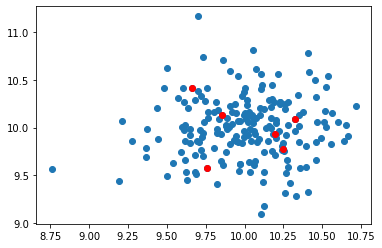

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

In [ ]:
model = LocalOutlierFactor(n_neighbors=20) 
model

LocalOutlierFactor()

In [ ]:
model.fit_predict(x)
lof = model.negative_outlier_factor_ 

In [ ]:
thresh = quantile(lof, .03)
print(thresh)

-1.5942619100478512


In [ ]:
index = where(lof<=thresh)
values = x[index]

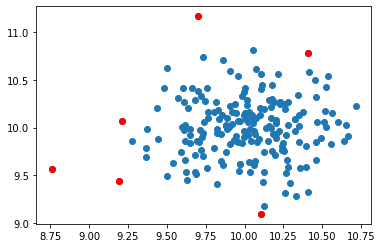

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()